# Analysis of lithology

In [2]:
import pandas as pd

#opening data 
new_data=pd.read_csv(r'C:/Users/ifue3702/Documents/lithology.csv')
print(min(new_data['latit']), max(new_data.latit))

-31.82898458 -29.83482575


In [3]:
new_data.columns.get_values()

array(['Unnamed: 0', 'HydroCode', 'OBJECTID', 'BoreID', 'RefElev',
       'RefElevDesc', 'FromDepth', 'ToDepth', 'TopElev', 'BottomElev',
       'MajorLithCode', 'MinorLithCode', 'Description', 'Source',
       'LogType', 'long', 'latit', 'East', 'North', 'Easting', 'Northing',
       'projection', 'dem', 'slope', 'mrrtf', 'mrvb', 'twi', 'curv',
       'aspect', 'river_distance'], dtype=object)

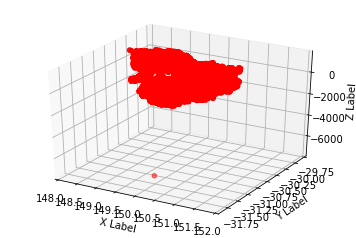

In [4]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

ax1.set_xlabel('X Label')
plt.xlim(148,152)
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')



ax1.scatter(new_data.long, new_data.latit, new_data.BottomElev, c='r', marker='o')



plt.show()

In [5]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

#subseting some colums
new_data.columns.get_values()
new_data2=new_data[['FromDepth', 'ToDepth', 'long', 'latit', 'MajorLithCode']]

#subsampling data 
samplek = new_data2.sample(n=10000)

#transforming it into matrix
arrayk=samplek.as_matrix()

# Plotting Major lithology against depth

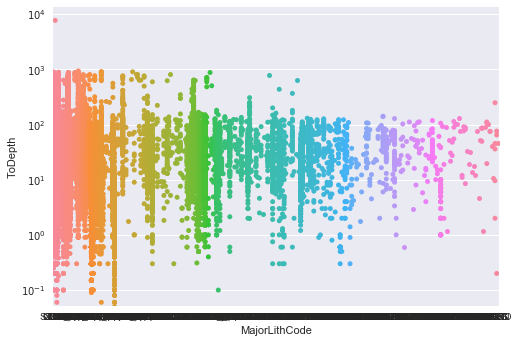

In [9]:
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)
import pylab
sns.stripplot(x=new_data2.MajorLithCode, y=new_data2.ToDepth);
#sns.plt.ylim(0,1000)
sns.plt.yscale('log')
#there is a value of depth = 8000 that I'm quite sure we need to delete

# Cluster by K modes (categorical data)
There are some clustering methods (unsupervised clasiffication) which can work with mixed datatype, in this case K modes and K medoids were analised. Also, the K means was used with some difficulties. Some of the methods require to calculate the Pdist, which creates a huge matrix. For that reason, just a random sample of 10000 values was used in most cases, but if we require to cluster all the dataset, we are going to need to do it in HPC.


In [151]:
from kmodes import kmodes

km = kmodes.KModes(n_clusters=20, init='Huang', n_init=10, verbose=1)

clusters = km.fit_predict(arrayk)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2436, cost: 39776.0
Run 1, iteration: 2/100, moves: 342, cost: 39774.0
Run 1, iteration: 3/100, moves: 0, cost: 39774.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1484, cost: 40873.0
Run 2, iteration: 2/100, moves: 38, cost: 40873.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1310, cost: 39659.0
Run 3, iteration: 2/100, moves: 199, cost: 39643.0
Run 3, iteration: 3/100, moves: 8, cost: 39643.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1403, cost: 39936.0
Run 4, iteration: 2/100, moves: 18, cost: 39936.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1006, cost: 39548.0
Run 5, iteration: 2/100, moves: 210, cos

In [108]:
help(kmodes)

Help on module kmodes.kmodes in kmodes:

NAME
    kmodes.kmodes - K-modes clustering for categorical data

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        KModes(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
    sklearn.base.ClusterMixin(builtins.object)
        KModes(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
    
    class KModes(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
     |  k-modes clustering algorithm for categorical data.
     |  
     |  Parameters
     |  -----------
     |  n_clusters : int, optional, default: 8
     |      The number of clusters to form as well as the number of
     |      centroids to generate.
     |  
     |  max_iter : int, default: 300
     |      Maximum number of iterations of the k-modes algorithm for a
     |      single run.
     |  
     |  n_init : int, default: 10
     |      Number of time the k-modes algorithm will be run with different
     |      centroid seeds. The final results will be t

In [152]:
#passing new cluster as a column to the dataframe
samplek['cluster']=clusters


## Ploting the clusters against depth

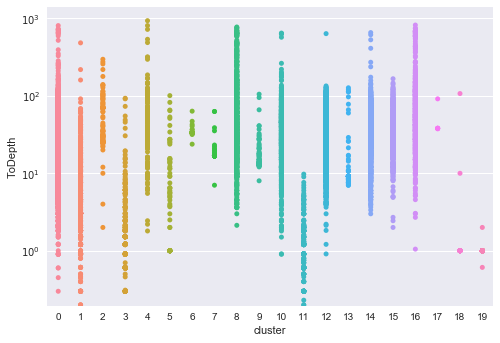

In [8]:
sns.stripplot(x=samplek.cluster, y=samplek.ToDepth);
sns.plt.yscale('log')

## Analysing the clusters 
This is the classification of the lithologies carried out by Kmodes.

In [153]:
for n in range(0,19):
    new=samplek[samplek.cluster==n]
    print('\n\n\ncluster: '+str(n)+'\n------------------------\n', new.MajorLithCode.value_counts())




cluster: 0
------------------------
 UNKN    903
SOIL    278
ROCK    153
GRNT    110
SDCY     97
20       59
SILT     53
CGLM     48
WB       43
SLTE     42
LOAM     41
SLSN     39
BLDR     37
COAL     37
MDSN     32
LMSN     27
ALVM     24
TPSL     23
SHLE     15
CLSN     14
CLSD     13
19       12
23       12
GRVL     12
BDRK      9
GRCL      9
99        8
QRTZ      8
CLAY      7
IRSN      7
       ... 
OPEN      1
CLCN      1
LBRN      1
IGVL      1
DRED      1
CVTY      1
FNCR      1
PEA       1
WTST      1
BCPD      1
DLRT      1
CLLM      1
PRPR      1
RBBL      1
SFBD      1
SDMR      1
SOAK      1
LAVA      1
CMNT      1
BNTN      1
WTCB      1
MARL      1
WRCK      1
PUG       1
HWRX      1
CLCT      1
LGHT      1
DLMT      1
ALUM      1
KHKI      1
Name: MajorLithCode, dtype: int64



cluster: 1
------------------------
 CLAY    2668
SHLE       8
GRVL       8
SAND       5
RIDG       5
BSLT       3
SDCY       2
GRNT       2
20         2
CGLM       1
ROCK       1
LGRY       

# Transforming categorical data into discrete values
This is carried out to run clusteriring methods that don't use categorical data

In [154]:
contain=new_data.MajorLithCode.factorize('MajorLithCode')
#transform categories in lithology to discrete numbers
ver=contain[0] #discrete variable

#Creating dictionary that store the equivalences (just in case)
a=new_data.MajorLithCode.as_matrix().tolist()
b=ver.tolist()
code_litho=dict(zip(a, b))

# Clustering by Kmeans

In [155]:
from sklearn.cluster import KMeans

new_data3=new_data[['FromDepth', 'ToDepth', 'long', 'latit']]
new_data3['litho']=ver
#subsampling data 
samplej = new_data3.sample(n=10000)
#transforming it into matrix
arrayj=samplej.as_matrix()
#clustering data
kmeans=KMeans(n_clusters=20).fit_predict(arrayj)

C:\Users\ifue3702\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


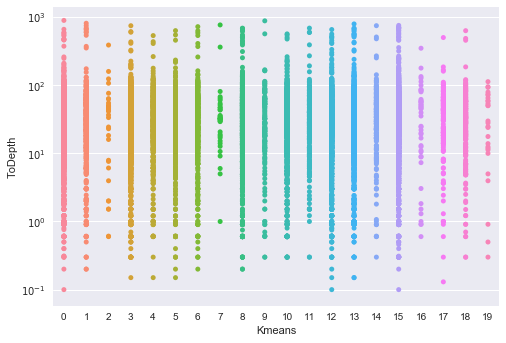

In [156]:
samplek['Kmeans']=kmeans
sns.stripplot(x=samplek.Kmeans, y=samplek.ToDepth);
sns.plt.yscale('log')

In [157]:
for n in range(0,19):
    new=samplek[samplek.Kmeans==n]
    print('\n\n\ncluster: '+str(n)+'\n------------------------\n', new.MajorLithCode.value_counts())




cluster: 0
------------------------
 CLAY    429
SAND    165
GRVL    151
UNKN    124
SHLE     96
BSLT     58
SDSN     50
TPSL     48
SOIL     43
ROCK     24
GRNT     16
20       12
SDCY     12
SLTE     11
COAL      8
MDSN      6
CGLM      6
SILT      5
LOAM      5
SLSN      5
SLCY      4
WB        3
LMSN      3
ALVM      3
RIDG      3
BLDR      2
IRSN      2
CLSN      2
BNST      2
WDDY      2
SLDG      2
BDRK      2
SNDY      1
WTRD      1
23        1
BKBN      1
FILL      1
CLCN      1
SLND      1
DRFT      1
LGNT      1
HWRX      1
WRCK      1
BRBN      1
BCPD      1
PEA       1
ERTH      1
CLSD      1
TUFF      1
FRCD      1
MARL      1
SASH      1
QRTZ      1
99        1
19        1
GRCL      1
DORT      1
STON      1
MUD       1
Name: MajorLithCode, dtype: int64



cluster: 1
------------------------
 CLAY    142
GRVL     43
SAND     38
UNKN     37
SHLE     28
SDSN     25
BSLT     22
TPSL     20
SOIL     15
SILT      7
ROCK      7
GRNT      4
SDCY      3
COAL      3
MDSN      

# K Medoids imported from R

### first define some functions to normalise the data and calculate the range

In [ ]:
import numbers
from scipy._lib.six import xrange
from sklearn.preprocessing import scale

#Normalize the array
def normalize_mixed_data_columns(arr, dtypes):
  
    if isinstance(arr,pd.DataFrame):
       arr =np.asmatrix(arr.copy())
    elif isinstance(arr,np.ndarray):
       arr =arr.copy()
    else:
       raise ValueError('A DataFrame or ndarray must be provided.')
    rows,cols = arr.shape
    for col in xrange(cols):
        if np.issubdtype(dtypes[col],np.number):
            max = arr[:,col].max()
            if (cols>1):
                arr[:,col] /= max
            else:    
                arr= arr/max
    return( arr)

#This is to obtain the range (max-min) values of each numeric column
def calc_range_mixed_data_columns(arr, dtypes):
    rows,cols = arr.shape
    
    result = np.zeros(cols)
    for col in xrange(cols):
        if np.issubdtype(dtypes[col],np.number):
            result[col]= arr[:,col].max()-arr[:,col].min()
    return( result)
    


In [ ]:
samplel=samplek.drop('Kcluster', 1)
dtypes=samplel.dtypes

normalised=normalize_mixed_data_columns(samplel, dtypes)
## I couldn't carried out the K medoid method by Python, so I migrate the data to R
np.savetxt('C:/Users/ifue3702/Documents/normalised.csv', normalised, fmt= '%f, %f, %f, %f, %s')

## I couldn't carry out the K medoid method by Python, the results were totally wrong with the inputs that I used, so I migrate the data to R

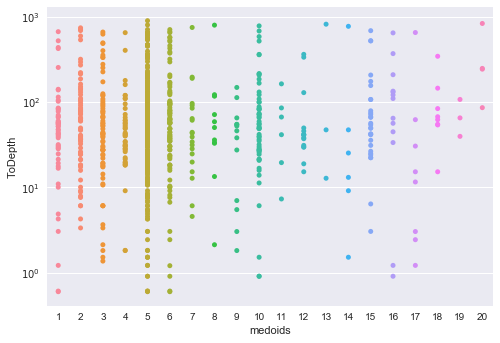

In [10]:
#ploting imported results of K medoids
sns.stripplot(x=med.medoids, y=samplek.ToDepth);
sns.plt.yscale('log')

In [6]:
med=pd.read_csv('C:/Users/ifue3702/Documents/medoids.csv')
for n in range(1,20):
    new=med[med.medoids==n]
    print('\n\n\ncluster: '+str(n)+'\n------------------------\n', new.Litho.value_counts())





cluster: 1
------------------------
  SDSN    541
 SFBD      2
 SDMN      1
 SGCY      1
Name: Litho, dtype: int64



cluster: 2
------------------------
  UNKN    878
 WB       47
 VLCC      4
 WDDY      3
 WRCK      2
 WHBN      2
 UCMD      1
Name: Litho, dtype: int64



cluster: 3
------------------------
  SAND    1113
 SBSL       7
Name: Litho, dtype: int64



cluster: 4
------------------------
  BSLT    473
 CGLM     78
 BRBN     11
 BRKN      1
 BNTN      1
 BRWN      1
Name: Litho, dtype: int64



cluster: 5
------------------------
  CLAY    3130
 CLBD       4
 CHRT       2
Name: Litho, dtype: int64



cluster: 6
------------------------
  GRVL    1173
 IRSN      14
 GYST       4
 LBRN       2
 GRSN       1
Name: Litho, dtype: int64



cluster: 7
------------------------
  ROCK    178
 QRTZ      8
 RIDG      5
 PHLT      2
 OXID      1
 PRPL      1
 QZPP      1
 RED       1
 QRTT      1
 PRPR      1
 RDBN      1
Name: Litho, dtype: int64



cluster: 8
--------------------

## skip this part because I couldn't make the kmedoids work in python

In [169]:
import Pycluster as PC

distances=PC.distancematrix(normalised1)
kmedoids=PC.kmedoids(distance=distances, nclusters=20, npass=1, initialid=None)

In [171]:
kmedoids[0]
#samplej['kmedoidss']=kmedoids
#samplej

array([1787, 8443, 6912, ..., 8443, 5644, 5644], dtype=int32)

In [100]:
#This function must be refactored on pdist module to support mixed data
def _copy_array_if_base_present(a):
    if a.base is not None:
        return a.copy()
    elif np.issubsctype(a, np.float32):
        return np.array(a, dtype=np.double)
    else:
        return a

#This function must be refactored on pdist module to support mixed data
def _convert_to_double(X):
    if X.dtype == np.object:
        return X.copy()
    if X.dtype != np.double:
        X = X.astype(np.double)
    if not X.flags.contiguous:
        X = X.copy()
    return X

#This function was copied from pdist because it is private. No change in the original function.
def _validate_vector(u, dtype=None):
    # XXX Is order='c' really necessary?
    u = np.asarray(u, dtype=dtype, order='c').squeeze()
    # Ensure values such as u=1 and u=[1] still return 1-D arrays.
    u = np.atleast_1d(u)
    if u.ndim > 1:
        raise ValueError("Input vector should be 1-D.")
    return u


#An excerpt from pdist function only with the basic structure to call the gower dist. 
#The original pdist must be adapted for Gower using this as example.
def pdist_(X, metric='euclidean', p=2, w=None, V=None, VI=None):
    X = np.asarray(X, order='c')

    # The C code doesn't do striding.
    X = _copy_array_if_base_present(X)

    s = X.shape
    if len(s) != 2:
        raise ValueError('A 2-dimensional array must be passed.')

    m, n = s
    dm = np.zeros((m * (m - 1)) // 2, dtype=np.double)

    #(...)
    dfun = metric
    k = 0
    for i in xrange(0, m - 1):
        for j in xrange(i + 1, m):
            dm[k] = dfun(X[i], X[j],V=V,w=w,VI=VI)
            k = k + 1

    return dm

In [101]:
from scipy.spatial.distance import pdist, squareform
import numbers

def gower(xi, xj,V=None,w=None,VI=None):
    cols = len(xj)
    
    xi=_validate_vector(xi)
    xj=_validate_vector(xj)

    if V is None:
        raise ValueError('An array with the (max-min) ranges for each numeric column must be passed in V.')

    if VI is None:
        raise ValueError('An array with the dtypes or each numeric column must be passed in VI.')

    if w is None:
        w=[1]*cols
    
    sum_sij =0.0
    sum_wij =0.0
    for col in xrange(cols):
        sij=0.0
        wij=0.0
        
        if np.issubdtype(VI[col], np.number):
            sij=abs(xi[col]-xj[col])/(V[col])
            wij=(w[col],0)[pd.isnull(xi[col]) or pd.isnull(xj[col])]
            
        else:
            sij=(1,0)[xi[col]==xj[col]]
            wij=(w[col],0)[pd.isnull(xi[col]) and pd.isnull(xj[col])]
        
        sum_sij+= (wij*sij)
        sum_wij+=wij

    
    return(sum_sij/sum_wij)


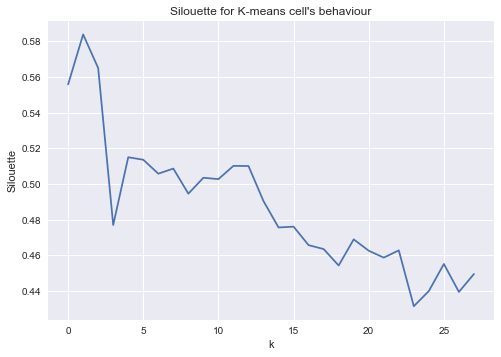

In [188]:
from sklearn.metrics import silhouette_score
s = []

for n_clusters in range(2,30):
    kmeans2 = KMeans(n_clusters=n_clusters)
    kmeans2.fit(arrayj)
    labels = KMeans(n_clusters=n_clusters).fit_predict(arrayj)
    

    s.append(silhouette_score(arrayj, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

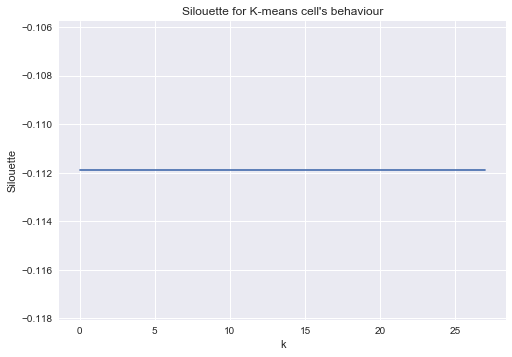

In [191]:
from sklearn.metrics import silhouette_score
s = []

for n_clusters in range(2,30):
       

    s.append(silhouette_score(arrayj, clusters, metric='mahalanobis'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

In [187]:
help(KMeans.fit_predict)

Help on function fit_predict in module sklearn.cluster.k_means_:

fit_predict(self, X, y=None)
    Compute cluster centers and predict cluster index for each sample.
    
    Convenience method; equivalent to calling fit(X) followed by
    predict(X).



In [109]:
normalised
np.savetxt('C:/Users/ifue3702/Documents/normalised.csv', normalised, fmt= '%f, %f, %f, %f, %s')

In [172]:
from scipy.spatial.distance import pdist
dmatrix=pdist(normalised1, 'mahalanobis', VI=None)


In [128]:
np.shape(dmatrix)

(49995000,)

## ----------------------------------------------------------------------------------------------------------------------

# Text clustering 
In this case, the data was clustered by analysing the descriptions. In order to do that, there are two main techniques, tokenizing which involves separating the words in the field, and steming, which allow to obtain just the root of the word.
Several words were filtered, such as colours or sizes, which tend to mask the actual lithology and group data by properties that don't have a real lithologic significance.
In the case of steming, it also play against the lithological clasification because it tends to truncate some lithologies depending on the root of the word, clustering sediments with rocks.

In [11]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [13]:
objectID=new_data.OBJECTID.tolist()
Descriptions=new_data.Description.tolist()
Dic=dict(zip(objectID, Descriptions))


In [14]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


In [16]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
colors=['redish', 'reddish', 'red', 'black', 'blackish', 'brown', 'brownish', 'blue', 'blueish', 'orange', 'orangeish', 
        'gray', 'grey', 'grayish', 'greyish', 'white', 'whiteish', 'purple', 'purpleish', 'yellow', 'yellowish',
       'green', 'greenish', 'light', 'very', 'pink','coarse', 'fine', 'medium', 'hard', 'soft', 'coloured']
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    
    stems = [stemmer.stem(t) for t in filtered_tokens]
    stems1 = [x for x in stems if x not in colors]
    return stems1


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_tokens1 = [x for x in filtered_tokens if x not in colors]
    return filtered_tokens1

In [19]:
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in Descriptions:
 
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [18]:
print(np.shape(totalvocab_tokenized),  np.shape(totalvocab_stemmed))

(357446,) (369812,)


In [23]:
#vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
#print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

In [241]:
help(TfidfVectorizer)

Help on class TfidfVectorizer in module sklearn.feature_extraction.text:

class TfidfVectorizer(CountVectorizer)
 |  Convert a collection of raw documents to a matrix of TF-IDF features.
 |  
 |  Equivalent to CountVectorizer followed by TfidfTransformer.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : string {'filename', 'file', 'content'}
 |      If 'filename', the sequence passed as an argument to fit is
 |      expected to be a list of filenames that need reading to fetch
 |      the raw content to analyze.
 |  
 |      If 'file', the sequence items must have a 'read' method (file-like
 |      object) that is called to fetch the bytes in memory.
 |  
 |      Otherwise the input is expected to be the sequence strings or
 |      bytes items are expected to be analyzed directly.
 |  
 |  encoding : string, 'utf-8' by default.
 |      If bytes or files are given to analyze, this encoding is used to
 |      decode.
 |

## Use of TF-IDF (term frequency - inverse document frequency) to cluster the data 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_only, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(Descriptions) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

Wall time: 1min 11s
(131940, 2)


In [24]:
terms = tfidf_vectorizer.get_feature_names()

In [26]:
##use this justy in case that we want to plot the distance between words in a plane
## In this case, I just want to obtain the clustering, and the memory runs out because of the data size
#from sklearn.metrics.pairwise import cosine_similarity
#import os  # for os.path.basename
#import matplotlib.pyplot as plt
#import matplotlib as mpl

#from sklearn.manifold import MDS

 
#dist1 = 1 - cosine_similarity(tfidf_matrix[:])
#MDS()
## convert two components as we're plotting points in a two-dimensional plane
## "precomputed" because we provide a distance matrix
## we will also specify `random_state` so the plot is reproducible.
#mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

#pos = mds.fit_transform(1-cosine_similarity(tfidf_matrix[:]))

In [27]:
from sklearn.cluster import KMeans

num_clusters = 21

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 21min 31s


Wall time: 22min 4s


In [392]:
new_data['text_clust']=clusters


In [393]:
new_data[['MajorLithCode', 'text_clust']]

,MajorLithCode,text_clust
0,SAND,0
1,CLAY,1
2,UNKN,0
3,CLAY,1
4,CLAY,1
5,CLAY,1
6,UNKN,0
7,SAND,0
8,SDSN,0
9,SDSN,0


In [394]:
for n in range(0,21):
    new=new_data[new_data.text_clust==n]
    print('\n\n\ncluster: '+str(n)+'\n------------------------\n', new.MajorLithCode.value_counts())




cluster: 0
------------------------
 SHLE    9450
SAND    7593
SDSN    6502
BSLT    6346
UNKN    5790
TPSL    4552
SOIL    3962
ROCK    2222
GRNT    1625
CGLM     837
CLAY     691
SLSN     666
LOAM     662
COAL     580
WB       561
SILT     561
MDSN     467
SLTE     460
ALVM     412
GRVL     359
LMSN     338
BLDR     336
CLSN     181
CLSD     140
IRSN     139
BDRK     123
BNST      95
VLCC      83
BLBN      81
99        80
        ... 
BCKS       1
LGHT       1
FLSC       1
RODN       1
ASH        1
CNSD       1
SHSD       1
CREK       1
FPPP       1
KOPI       1
MRNN       1
SEMS       1
NDLR       1
FLDP       1
SEMI       1
RDDS       1
SHFT       1
ARKS       1
CGLD       1
ALWD       1
KHKI       1
LBIL       1
VSND       1
STND       1
CBSD       1
NMRN       1
TRCN       1
RDST       1
CRKD       1
PRPL       1
Name: MajorLithCode, dtype: int64



cluster: 1
------------------------
 CLAY    34376
UNKN     3650
SAND     1217
SDCY     1144
20        757
SLCY      393
SOIL     

There is another mixed clustering method which is called the two step method, developed by IBM, but it  only worksi n spss. Pleople say that it works well. 
By converting categorical data to discrete values, clustering algorithms work bad because they are based on distance calculations and categorical data cannot be spatially represented. That is the reason of the bad behaviour in Kmeans compared to Kmodes and Kmedoids.
By the other hand, the text clustering is also skipping the spatial distribution of the data.

## skip the rest of the document

In [6]:
#code to extract points at different intervales from borelogs

Imax=0.2 #intervale depth
bue=[]

for index, row in new_data.iterrows(): #loop over all the data (pick each row)
    
    if 0<new_data['TopElev'][index]-new_data['BottomElev'][index]<1.5*Imax: #first condition: if thicknes is very low
        a=[new_data['long'][index], new_data['latit'][index], (new_data['TopElev'][index]-new_data['BottomElev'][index])/2, new_data['MajorLithCode'][index], new_data['dem'][index], new_data['slope'][index],new_data['mrrtf'][index], new_data['mrvb'][index], new_data['twi'][index], new_data['curv'][index], new_data['aspect'][index], new_data['river_distance'][index]]   
        #write a list with x, y, z, litho
        bue.append(a) #add list
    elif 1.5*Imax<=new_data['TopElev'][index]-new_data['BottomElev'][index]<=2.5*Imax: #second way, if thicknes is between two intemediate values 
        a1=[new_data['long'][index], new_data['latit'][index], new_data['TopElev'][index]-Imax/2, new_data['MajorLithCode'][index], new_data['dem'][index], new_data['slope'][index],new_data['mrrtf'][index], new_data['mrvb'][index], new_data['twi'][index], new_data['curv'][index], new_data['aspect'][index], new_data['river_distance'][index]]
        a2=[new_data['long'][index], new_data['latit'][index], new_data['BottomElev'][index]+Imax/2, new_data['MajorLithCode'][index], new_data['dem'][index], new_data['slope'][index],new_data['mrrtf'][index], new_data['mrvb'][index], new_data['twi'][index], new_data['curv'][index], new_data['aspect'][index], new_data['river_distance'][index]]
        bue.append(a1)
        bue.append(a2)
        #it pick two points from strata and add it to the list
    elif new_data['TopElev'][index]-new_data['BottomElev'][index]>2.5*Imax: #third way, if thicknes is higher than
        X=int(round(((new_data['TopElev'][index]-Imax/2)-(new_data['BottomElev'][index]+Imax/2))/Imax))
        N=range(1,X) #N number of intermediate point extractions in the strata
        Ic=((new_data['TopElev'][index]-Imax/2)-(new_data['BottomElev'][index]+Imax/2))/X
        #top extraction point
        zini=[new_data['long'][index], new_data['latit'][index], new_data['TopElev'][index]-Imax/2, new_data['MajorLithCode'][index], new_data['dem'][index], new_data['slope'][index],new_data['mrrtf'][index], new_data['mrvb'][index], new_data['twi'][index], new_data['curv'][index], new_data['aspect'][index], new_data['river_distance'][index]]
        #bottom extraction point
        zfin=[new_data['long'][index], new_data['latit'][index], new_data['BottomElev'][index]+Imax/2, new_data['MajorLithCode'][index], new_data['dem'][index], new_data['slope'][index],new_data['mrrtf'][index], new_data['mrvb'][index], new_data['twi'][index], new_data['curv'][index], new_data['aspect'][index], new_data['river_distance'][index]]
        bue.append(zini)
        bue.append(zfin)
        for n in N:
            bue.append([new_data['long'][index], new_data['latit'][index], new_data['TopElev'][index]-Imax/2-(Ic*n), new_data['MajorLithCode'][index], new_data['dem'][index], new_data['slope'][index],new_data['mrrtf'][index], new_data['mrvb'][index], new_data['twi'][index], new_data['curv'][index], new_data['aspect'][index], new_data['river_distance'][index]])
        #loop over each of the intermediate points to extract, defining x, y, z and litho in each, and finally adding to the list     
    else:
        continue
        
new_data1=np.asarray(bue)
georeferences=np.asarray(new_data1[:,0:3], dtype=np.float64)
lithology=np.asarray(new_data1[:,3], dtype='str')
surface_feat=np.asarray(new_data1[:,4:], dtype=np.float64)

In [9]:
geolo=pd.DataFrame(bue)


In [14]:
geolo.columns = ['long', 'latit', 'depth', 'litho', 'Elevation', 'slope', 'mrrtf', 'mrvb', 'twi', 'curv', 'aspect', 'river_dist']
geolo.to_csv('C:\\Users\\ifue3702\\Documents\\geoloco.csv')

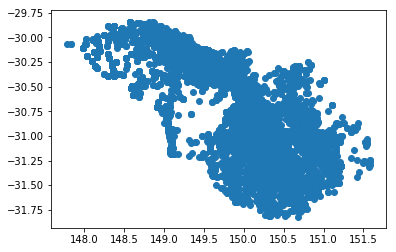

In [18]:
samples = geolo.sample(n=10000)
samples1=samples.drop('litho', 1)
array=samples1[['long','latit', 'depth', 'Elevation', 'slope', 'mrrtf', 'mrvb', 'twi', 'curv', 'aspect', 'river_dist']].as_matrix()



In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline

z=linkage(array, 'ward')



In [22]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(z, pdist(array))
c

0.81765997059112983

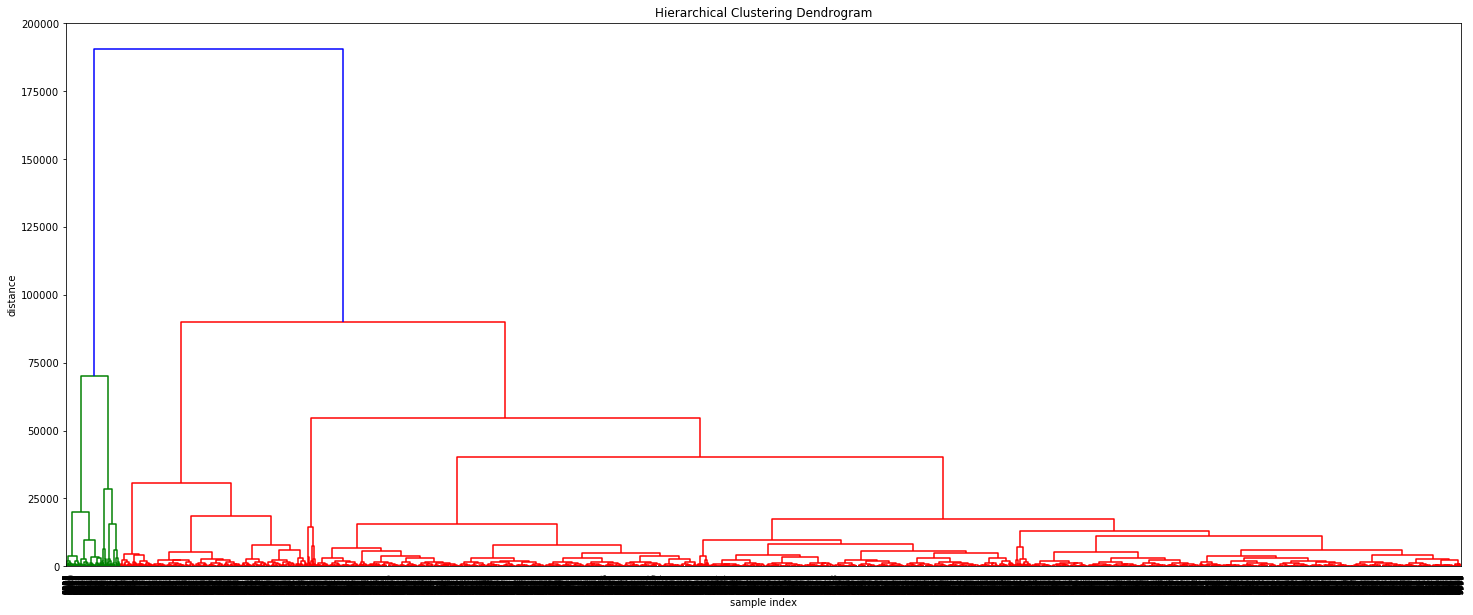

In [26]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

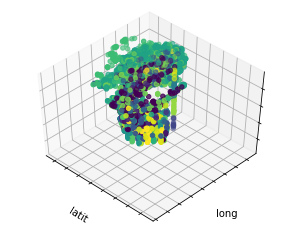

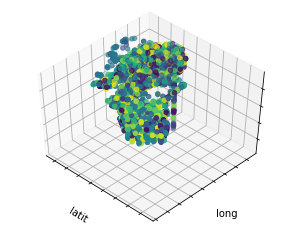

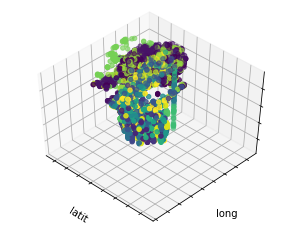

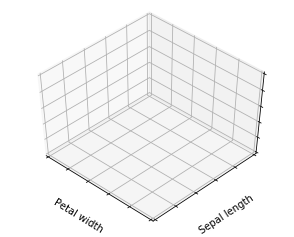

In [29]:
centers = [[1, 1], [-1, -1], [1, -1]]
x=array
y=samples['litho'].as_matrix()
estimators = {'k_means_samples3': KMeans(n_clusters=20),
              'k_means_samples8': KMeans(n_clusters=100),
              'k_means_samples_init': KMeans(n_clusters=20, n_init=1,
                                              init='random')}
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    est.fit(x)
    labels = est.labels_
    
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=labels)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('latit')
    ax.set_ylabel('long')
    ax.set_zlabel('depth')
    fignum = fignum + 1
    
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()



ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()


In [26]:
#code to extract points at different intervales from borelogs

Imax=0.2 #intervale depth
bue=[]

for index, row in data.iterrows(): #loop over all the data (pick each row)
    
    if 0<data['TopElev'][index]-data['BottomElev'][index]<1.5*Imax: #first condition: if thicknes is very low
        a=[data['long'][index], data['latit'][index], (data['TopElev'][index]-data['BottomElev'][index])/2, data['MajorLithCode'][index]]
        #write a list with x, y, z, litho
        bue.append(a) #add list
    elif 1.5*Imax<=data['TopElev'][index]-data['BottomElev'][index]<=2.5*Imax: #second way, if thicknes is between two intemediate values 
        a1=[data['long'][index], data['latit'][index], data['TopElev'][index]-Imax/2, data['MajorLithCode'][index]]
        a2=[data['long'][index], data['latit'][index], data['BottomElev'][index]+Imax/2, data['MajorLithCode'][index]]
        bue.append(a1)
        bue.append(a2)
        #it pick two points from strata and add it to the list
    elif data['TopElev'][index]-data['BottomElev'][index]>2.5*Imax: #third way, if thicknes is higher than
        X=int(round(((data['TopElev'][index]-Imax/2)-(data['BottomElev'][index]+Imax/2))/Imax))
        N=range(1,X) #N number of intermediate point extractions in the strata
        Ic=((data['TopElev'][index]-Imax/2)-(data['BottomElev'][index]+Imax/2))/X
        zini=[data['long'][index], data['latit'][index], data['TopElev'][index]-Imax/2, data['MajorLithCode'][index]]#top extraction point
        zfin=[data['long'][index], data['latit'][index], data['BottomElev'][index]+Imax/2, data['MajorLithCode'][index]]#bottom extraction point
        bue.append(zini)
        bue.append(zfin)
        for n in N:
            bue.append([data['long'][index], data['latit'][index], data['TopElev'][index]-Imax/2-(Ic*n), data['MajorLithCode'][index]])
        #loop over each of the intermediate points to extract, defining x, y, z and litho in each, and finally adding to the list     
    else:
        continue
        
new_data=np.asarray(bue)
georeferences=np.asarray(new_data[:,0:3], dtype=np.float64)
lithology=np.asarray(new_data[:,3], dtype='str')



23424
23611
29005
42288
42448
42568
43265
43986
45014
45125
45341
45919
46426
47046
47483
56885
95089
95090
95094
95104
95106
95108
96608
96618
97440
97459
97935
97953
97958
98692
102753
103408
103429
103664
105047
111370
111719
113982
114012
114314
114916
118890
119408
122195
122275
123120
123138
124154
124254
124333
124911
125859
127320
128575
129614
129794
130035
130479
130820
131252
131799


TypeError: Mismatch between array dtype ('<U32') and format specifier ('%.18e,%.18e,%.18e,%.18e')

In [7]:
x=georeferences[0:,0]
y=georeferences[0:,1]
z=georeferences[0:,2]


In [106]:
import pandas as pd


litho_n=pd.factorize(lithology)#transform categories in lithology to discrete numbers
ver=litho_n[0] #discrete variable

#count elements for each category
ver2=np.bincount(ver) 
ii=np.nonzero(ver2)[0]
np.vstack((ii, ver2[ii])).T



In [145]:
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

Nx, Ny, Nz = np.shape(x)[0], np.shape(y)[0], np.shape(z)[0]
subsample=10000
Mx, My, Mz= Nx//subsample, Ny//subsample, Nz//subsample

# Create a uniformly spaced grid
xi = np.linspace(round(float(np.asscalar(min(x)))), round(float(np.asscalar(max(x)))), Mx)
yi = np.linspace(round(float(np.asscalar(min(y)))), round(float(np.asscalar(max(y)))), My)
zi = np.linspace(round(float(np.asscalar(min(y)))), round(float(np.asscalar(max(z)))), Mz)
X_uniform, Y_uniform, Z_uniform = (
    xi[:, None, None], yi[None, :, None], zi[None, None, :])

D_interpolated = interpolate.griddata(
    (x, y, z),
    ver,
    (X_uniform, Y_uniform, Z_uniform),
    method='linear')

In [148]:
D_interpolated

array([[[ 31.30810837,  31.30810837,  31.30810837, ...,          nan,
                  nan,          nan],
        [ 28.34153225,  28.05040589,  27.75927953, ...,          nan,
                  nan,          nan],
        [ 27.07966811,  27.07966811,  27.07966811, ...,          nan,
                  nan,          nan],
        ..., 
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[ 28.95497737,  28.66385101,  28.37272465, ...,          nan,
                  nan,          nan],
        [ 26.81241622,  26.81241622,  26.81241622, ...,          nan,
                  nan,          nan],
        [ 25.69911904,  28.06051846,  25.69911904, ...,          nan,
                  nan,          nan],
        ...,

MemoryError: 

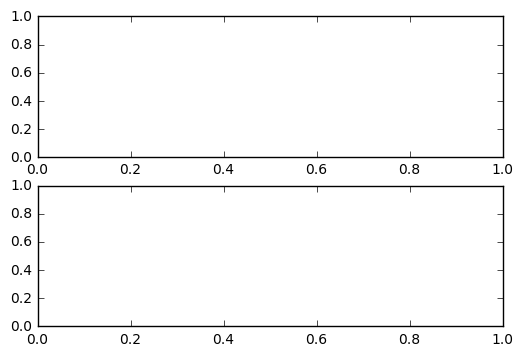

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
# Make plots
fig, ax = plt.subplots(2)

# Choose a z value in the uniform z-grid
# Let's take the middle value
zindex = Mz // 2
z_crosssection = zi[zindex]

# Plot a cross-section of the raw irregularly spaced data
X_irr, Y_irr = np.meshgrid(sorted(x), sorted(y))
# find the value in the irregular z-grid closest to z_crosssection
z_near_cross = z[(np.abs(z - z_crosssection)).argmin()]
ax[0].contourf(X_irr, Y_irr, func(X_irr, Y_irr, z_near_cross))
ax[0].scatter(X_irr, Y_irr, c='white', s=20)   
ax[0].set_title('Cross-section of irregular data')
ax[0].set_xlim(x.min(), x.max())
ax[0].set_ylim(y.min(), y.max())

# Plot a cross-section of the Interpolated uniformly spaced data
X_unif, Y_unif = np.meshgrid(xi, yi)
ax[1].contourf(X_unif, Y_unif, D_interpolated[:, :, zindex])
ax[1].scatter(X_unif, Y_unif, c='white', s=20)
ax[1].set_title('Cross-section of downsampled and interpolated data')
ax[1].set_xlim(x.min(), x.max())
ax[1].set_ylim(y.min(), y.max())

plt.show()

In [149]:
from scipy.interpolate import RegularGridInterpolator

In [150]:
 my_interpolating_function = RegularGridInterpolator((x, y, z), ver)

ValueError: There are 3 point arrays, but values has 1 dimensions

In [152]:
pts = ( np.array([0,1.]), )*3
pts

(array([ 0.,  1.]), array([ 0.,  1.]), array([ 0.,  1.]))

In [154]:
pts = ( np.array([0,1.]), np.array([0,1.]), np.array([0,0.5,1.]) )
pts

(array([ 0.,  1.]), array([ 0.,  1.]), array([ 0. ,  0.5,  1. ]))

In [155]:
val_size = map(lambda q: q.shape[0], pts)

In [165]:
help(Rbf)

Help on class Rbf in module scipy.interpolate.rbf:

class Rbf(builtins.object)
 |  Rbf(*args)
 |  
 |  A class for radial basis function approximation/interpolation of
 |  n-dimensional scattered data.
 |  
 |  Parameters
 |  ----------
 |  *args : arrays
 |      x, y, z, ..., d, where x, y, z, ... are the coordinates of the nodes
 |      and d is the array of values at the nodes
 |  function : str or callable, optional
 |      The radial basis function, based on the radius, r, given by the norm
 |      (default is Euclidean distance); the default is 'multiquadric'::
 |  
 |          'multiquadric': sqrt((r/self.epsilon)**2 + 1)
 |          'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
 |          'gaussian': exp(-(r/self.epsilon)**2)
 |          'linear': r
 |          'cubic': r**3
 |          'quintic': r**5
 |          'thin_plate': r**2 * log(r)
 |  
 |      If callable, then it must take 2 arguments (self, r).  The epsilon
 |      parameter will be available as self.epsilon.  Othe

In [172]:
np.shape(ver[0:10000])

(10000,)

In [166]:
>>> from scipy.interpolate import Rbf
>>> x, y, z, d = np.random.rand(4, 50)
>>> rbfi = Rbf(x, y, z, d, function='linear')  # radial basis function interpolator instance
>>> xi = yi = zi = np.linspace(0, 1, 20)
>>> di = rbfi(xi, yi, zi)   # interpolated values
>>> di.shape

(20,)

In [185]:
xi = yi = zi = np.linspace(0, 1, 100)
di=rbfi(xi, yi, zi)   # interpolated values
di.shape

(100,)

In [179]:
rbfi = Rbf(x[0:10000], y[0:10000], z[0:10000], ver[0:10000], function='linear')

In [ ]:
""" invdisttree.py: inverse-distance-weighted interpolation using KDTree
    fast, solid, local
"""
from __future__ import division
import numpy as np
from scipy.spatial import cKDTree as KDTree
    # http://docs.scipy.org/doc/scipy/reference/spatial.html

__date__ = "2017-11-09 Nov"  # weights, doc

#...............................................................................
class Invdisttree:
    """ inverse-distance-weighted interpolation using KDTree:
invdisttree = Invdisttree( X, z )  -- data points, values
interpol = invdisttree( q, nnear=3, eps=0, p=1, weights=None, stat=0 )
    interpolates z from the 3 points nearest each query point q;
    For example, interpol[ a query point q ]
    finds the 3 data points nearest q, at distances d1 d2 d3
    and returns the IDW average of the values z1 z2 z3
        (z1/d1 + z2/d2 + z3/d3)
        / (1/d1 + 1/d2 + 1/d3)
        = .55 z1 + .27 z2 + .18 z3  for distances 1 2 3

    q may be one point, or a batch of points.
    eps: approximate nearest, dist <= (1 + eps) * true nearest
    p: use 1 / distance**p
    weights: optional multipliers for 1 / distance**p, of the same shape as q
    stat: accumulate wsum, wn for average weights

How many nearest neighbors should one take ?
a) start with 8 11 14 .. 28 in 2d 3d 4d .. 10d; see Wendel's formula
b) make 3 runs with nnear= e.g. 6 8 10, and look at the results --
    |interpol 6 - interpol 8| etc., or |f - interpol*| if you have f(q).
    I find that runtimes don't increase much at all with nnear -- ymmv.

p=1, p=2 ?
    p=2 weights nearer points more, farther points less.
    In 2d, the circles around query points have areas ~ distance**2,
    so p=2 is inverse-area weighting. For example,
        (z1/area1 + z2/area2 + z3/area3)
        / (1/area1 + 1/area2 + 1/area3)
        = .74 z1 + .18 z2 + .08 z3  for distances 1 2 3
    Similarly, in 3d, p=3 is inverse-volume weighting.

Scaling:
    if different X coordinates measure different things, Euclidean distance
    can be way off.  For example, if X0 is in the range 0 to 1
    but X1 0 to 1000, the X1 distances will swamp X0;
    rescale the data, i.e. make X0.std() ~= X1.std() .

A nice property of IDW is that it's scale-free around query points:
if I have values z1 z2 z3 from 3 points at distances d1 d2 d3,
the IDW average
    (z1/d1 + z2/d2 + z3/d3)
    / (1/d1 + 1/d2 + 1/d3)
is the same for distances 1 2 3, or 10 20 30 -- only the ratios matter.
In contrast, the commonly-used Gaussian kernel exp( - (distance/h)**2 )
is exceedingly sensitive to distance and to h.

    """
# anykernel( dj / av dj ) is also scale-free
# error analysis, |f(x) - idw(x)| ? todo: regular grid, nnear ndim+1, 2*ndim

    def __init__( self, X, z, leafsize=10, stat=0 ):
        assert len(X) == len(z), "len(X) %d != len(z) %d" % (len(X), len(z))
        self.tree = KDTree( X, leafsize=leafsize )  # build the tree
        self.z = z
        self.stat = stat
        self.wn = 0
        self.wsum = None;

    def __call__( self, q, nnear=6, eps=0, p=1, weights=None ):
            # nnear nearest neighbours of each query point --
        q = np.asarray(q)
        qdim = q.ndim
        if qdim == 1:
            q = np.array([q])
        if self.wsum is None:
            self.wsum = np.zeros(nnear)

        self.distances, self.ix = self.tree.query( q, k=nnear, eps=eps )
        interpol = np.zeros( (len(self.distances),) + np.shape(self.z[0]) )
        jinterpol = 0
        for dist, ix in zip( self.distances, self.ix ):
            if nnear == 1:
                wz = self.z[ix]
            elif dist[0] < 1e-10:
                wz = self.z[ix[0]]
            else:  # weight z s by 1/dist --
                w = 1 / dist**p
                if weights is not None:
                    w *= weights[ix]  # >= 0
                w /= np.sum(w)
                wz = np.dot( w, self.z[ix] )
                if self.stat:
                    self.wn += 1
                    self.wsum += w
            interpol[jinterpol] = wz
            jinterpol += 1
        return interpol if qdim > 1  else interpol[0]

#...............................................................................
if __name__ == "__main__":
    import sys

    N = 10000
    Ndim = 2
    Nask = N  # N Nask 1e5: 24 sec 2d, 27 sec 3d on mac g4 ppc
    Nnear = 8  # 8 2d, 11 3d => 5 % chance one-sided -- Wendel, mathoverflow.com
    leafsize = 10
    eps = .1  # approximate nearest, dist <= (1 + eps) * true nearest
    p = 1  # weights ~ 1 / distance**p
    cycle = .25
    seed = 1

    exec "\n".join( sys.argv[1:] )  # python this.py N= ...
    np.random.seed(seed )
    np.set_printoptions( 3, threshold=100, suppress=True )  # .3f

    print "\nInvdisttree:  N %d  Ndim %d  Nask %d  Nnear %d  leafsize %d  eps %.2g  p %.2g" % (
        N, Ndim, Nask, Nnear, leafsize, eps, p)

    def terrain(x):
        """ ~ rolling hills """
        return np.sin( (2*np.pi / cycle) * np.mean( x, axis=-1 ))

    known = np.random.uniform( size=(N,Ndim) ) ** .5  # 1/(p+1): density x^p
    z = terrain( known )
    ask = np.random.uniform( size=(Nask,Ndim) )

#...............................................................................
    invdisttree = Invdisttree( known, z, leafsize=leafsize, stat=1 )
    interpol = invdisttree( ask, nnear=Nnear, eps=eps, p=p )

    print "average distances to nearest points: %s" % \
        np.mean( invdisttree.distances, axis=0 )
    print "average weights: %s" % (invdisttree.wsum / invdisttree.wn)
        # see Wikipedia Zipf's law
    err = np.abs( terrain(ask) - interpol )
    print "average |terrain() - interpolated|: %.2g" % np.mean(err)

    # print "interpolate a single point: %.2g" % \
    #     invdisttree( known[0], nnear=Nnear, eps=eps )

In [8]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [9]:
# some setting for this notebook to actually show the graphs inline, you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [11]:
X=new_data1[:,0:3]

In [38]:
import pandas as pd


litho_n=pd.factorize(lithology)#transform categories in lithology to discrete numbers
ver=litho_n[0] #discrete variable
X1=np.zeros(shape=(X.shape[0], 4))
X1[:,0]=x
X1[:,1]=y
X1[:,2]=z
X1[:,3]=ver


(3937565, 4)

In [40]:
# generate the linkage matrix
Z = linkage(X1, 'ward')

MemoryError: 

In [ ]:
ipcluster nbextension enable

In [325]:
da=np.array([[0, 8, 0], [1, 6, 1], [2, 2, 5]])
1-da

array([[ 1, -7,  1],
       [ 0, -5,  0],
       [-1, -1, -4]])

In [327]:
de=np.array([[1, 1, 1], [3,10,3], [2, 2, 2]])
di=np.vstack((da,de))
np.shape(di)
1-di


array([[ 1, -7,  1],
       [ 0, -5,  0],
       [-1, -1, -4],
       [ 0,  0,  0],
       [-2, -9, -2],
       [-1, -1, -1]])

In [42]:
new_data['mean_depth']=(new_data['TopElev']+new_data['BottomElev'])/2

In [56]:
x2=new_data['long']
y2=new_data['latit']
z2=new_data['mean_depth']
Y=new_data['MajorLithCode']

litho_Y=pd.factorize(Y)#transform categories in lithology to discrete numbers
verY=litho_Y[0] 

new_array=np.zeros(shape=(np.shape(Y)[0],4))
new_array[:,0]=x2
new_array[:,1]=y2
new_array[:,2]=z2
new_array[:,3]=verY

In [57]:
# generate the linkage matrix
Z = linkage(new_array, 'ward')

MemoryError: 

In [129]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Lars Buitinck
# License: BSD 3 clause

from __future__ import print_function

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse commandline arguments
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")

print(__doc__)
op.print_help()

(opts, args) = op.parse_args()
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

Automatically created module for IPython interactive environment
Usage: __main__.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.


Usage: __main__.py [options]

__main__.py: error: no such option: -f


SystemExit: 2

C:\Users\ifue3702\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [130]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', non_negative=True,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       non_negative=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()

2017-02-15 13:56:34,554 INFO Downloading 20news dataset. This may take a few minutes.


Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']


2017-02-15 13:56:34,656 WARNING Downloading dataset from http://people.csail.mit.edu/jrennie/20Newsgroups/20news-bydate.tar.gz (14 MB)
2017-02-15 13:57:38,571 INFO Decompressing C:\Users\ifue3702\scikit_learn_data\20news_home\20news-bydate.tar.gz


3387 documents
4 categories

Extracting features from the training dataset using a sparse vectorizer


NameError: name 'opts' is not defined

In [ ]:
dframe11=data[0:2]
df11=pd.DataFrame()
df11['x']=0
df11['y']=0
df11['z']=0
df11['litho']=0
Imax=0.2
dfarray11=df11.values
b12=[]
for index,row in dframe11.iterrows():
    if dframe11['TopElev'][index]-dframe11['BottomElev'][index]>2.5*Imax:
        X11=int(round(((dframe11['TopElev'][index]-Imax/2)-(dframe11['BottomElev'][index]+Imax/2))/Imax))
        N11=range(1,X11)
        Ic11=((dframe11['TopElev'][index]-Imax/2)-(dframe11['BottomElev'][index]+Imax/2))/X11
        zini11=[dframe11['long'][index], dframe11['latit'][index], dframe11['TopElev'][index]-Imax/2, dframe11['MajorLithCode'][index]]     
        zfin11=[dframe11['long'][index], dframe11['latit'][index], dframe11['BottomElev'][index]+Imax/2, dframe11['MajorLithCode'][index]]
        b12.append(zini11)
        b12.append(zfin11)
        for n in N11:
            b12.append([dframe11['long'][index], dframe11['latit'][index], dframe11['TopElev'][index]-Imax/2-(Ic11*n), dframe11['MajorLithCode'][index]])
        #for item in b12:
        #    zini11.append(item)
         
        
        #zini11.append(zfin11)
        #dfarray11=np.vstack((zini11))